# Using Tensorflow V 2.0 to classify Fashion mnist

In [3]:
pip install -U tensorflow_datasets

  Using cached https://files.pythonhosted.org/packages/d9/b8/457ad44e8748fbe5021b4ca7e7d589b5852881bbb11bca4d947952a13558/tensorflow_datasets-1.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7d/e3/20f3d364d6c8e5d2353c72a67778eb189176f08e873c9900e10c0287b84b/requests-2.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/08/b7/3fc74574aa9aff44491cce996711dd6094653c20d9e2800be4efb054e0da/tensorflow_metadata-0.13.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6c/4b/c38b5144cf167c4f52288517436ccafefe9dc01b8d1c190e18a6b154cd4a/tqdm-4.31.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/

In [40]:
from __future__ import absolute_import, division, print_function

In [41]:

import tensorflow as tf
import tensorflow_datasets as tfds
#tf.logging.set_verbosity(tf.logging.ERROR)

In [43]:
#tf.logging.set_verbosity(tf.logging.ERROR)


In [44]:
#dir(tf)

In [10]:
#!pip install matplotlib

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [8]:
print(tf.__version__)

2.0.0-alpha0


# Import Fashion MNIST dataset

In [11]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0330 06:52:08.417009 477080 deprecation.py:323] From C:\Users\edwvi\Anaconda3\envs\tf2_cpu\lib\site-packages\tensorflow_datasets\core\file_format_adapter.py:249: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [13]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [14]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

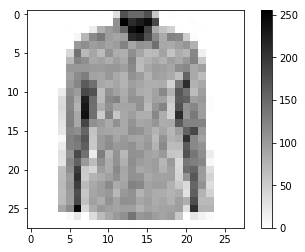

In [15]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

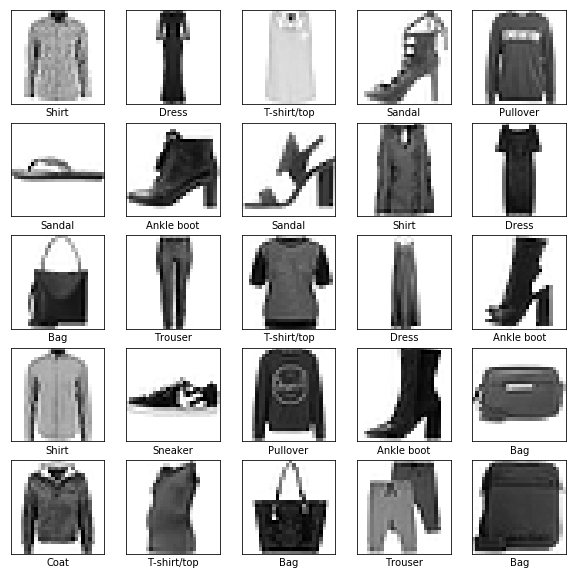

In [16]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

# Build the model

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [19]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [49]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


1078/1875 [================>.............] - ETA: 6:40:28 - loss: 0.7320 - accuracy: 0.843 - ETA: 50:04 - loss: 0.6474 - accuracy: 0.8008  - ETA: 36:29 - loss: 0.5987 - accuracy: 0.798 - ETA: 21:07 - loss: 0.5596 - accuracy: 0.822 - ETA: 17:29 - loss: 0.5557 - accuracy: 0.820 - ETA: 13:25 - loss: 0.5417 - accuracy: 0.828 - ETA: 11:52 - loss: 0.5465 - accuracy: 0.827 - ETA: 10:21 - loss: 0.5453 - accuracy: 0.831 - ETA: 9:53 - loss: 0.5331 - accuracy: 0.835 - ETA: 9:01 - loss: 0.5320 - accuracy: 0.83 - ETA: 8:18 - loss: 0.5284 - accuracy: 0.83 - ETA: 8:00 - loss: 0.5308 - accuracy: 0.83 - ETA: 7:26 - loss: 0.5209 - accuracy: 0.83 - ETA: 6:36 - loss: 0.5126 - accuracy: 0.83 - ETA: 6:01 - loss: 0.5254 - accuracy: 0.83 - ETA: 5:46 - loss: 0.5248 - accuracy: 0.83 - ETA: 5:03 - loss: 0.5329 - accuracy: 0.83 - ETA: 4:46 - loss: 0.5413 - accuracy: 0.83 - ETA: 4:30 - loss: 0.5370 - accuracy: 0.83 - ETA: 4:19 - loss: 0.5388 - accuracy: 0.83 - ETA: 4:02 - loss: 0.5420 - accuracy: 0.82 - ETA: 3:38 

1875/1875 [==============================] - ETA: 17s - loss: 0.5195 - accuracy: 0.828 - ETA: 17s - loss: 0.5192 - accuracy: 0.829 - ETA: 17s - loss: 0.5192 - accuracy: 0.828 - ETA: 17s - loss: 0.5192 - accuracy: 0.829 - ETA: 16s - loss: 0.5193 - accuracy: 0.828 - ETA: 16s - loss: 0.5197 - accuracy: 0.828 - ETA: 16s - loss: 0.5200 - accuracy: 0.828 - ETA: 16s - loss: 0.5196 - accuracy: 0.828 - ETA: 16s - loss: 0.5196 - accuracy: 0.828 - ETA: 16s - loss: 0.5196 - accuracy: 0.828 - ETA: 16s - loss: 0.5198 - accuracy: 0.828 - ETA: 15s - loss: 0.5205 - accuracy: 0.828 - ETA: 15s - loss: 0.5205 - accuracy: 0.828 - ETA: 15s - loss: 0.5205 - accuracy: 0.828 - ETA: 15s - loss: 0.5204 - accuracy: 0.828 - ETA: 15s - loss: 0.5205 - accuracy: 0.828 - ETA: 15s - loss: 0.5205 - accuracy: 0.829 - ETA: 14s - loss: 0.5199 - accuracy: 0.829 - ETA: 14s - loss: 0.5200 - accuracy: 0.829 - ETA: 14s - loss: 0.5194 - accuracy: 0.829 - ETA: 14s - loss: 0.5192 - accuracy: 0.829 - ETA: 14s - loss: 0.5198 - accur

1123/1875 [================>.............] - ETA: 3:18 - loss: 0.5369 - accuracy: 0.87 - ETA: 32s - loss: 0.5314 - accuracy: 0.8333 - ETA: 35s - loss: 0.5094 - accuracy: 0.835 - ETA: 26s - loss: 0.5168 - accuracy: 0.829 - ETA: 27s - loss: 0.5185 - accuracy: 0.835 - ETA: 24s - loss: 0.5097 - accuracy: 0.838 - ETA: 24s - loss: 0.5000 - accuracy: 0.837 - ETA: 21s - loss: 0.5108 - accuracy: 0.834 - ETA: 22s - loss: 0.5106 - accuracy: 0.831 - ETA: 21s - loss: 0.5050 - accuracy: 0.833 - ETA: 20s - loss: 0.5143 - accuracy: 0.829 - ETA: 21s - loss: 0.5092 - accuracy: 0.832 - ETA: 19s - loss: 0.5094 - accuracy: 0.830 - ETA: 20s - loss: 0.5172 - accuracy: 0.830 - ETA: 20s - loss: 0.5214 - accuracy: 0.830 - ETA: 19s - loss: 0.5276 - accuracy: 0.831 - ETA: 20s - loss: 0.5232 - accuracy: 0.832 - ETA: 20s - loss: 0.5261 - accuracy: 0.831 - ETA: 19s - loss: 0.5282 - accuracy: 0.829 - ETA: 19s - loss: 0.5269 - accuracy: 0.829 - ETA: 18s - loss: 0.5173 - accuracy: 0.831 - ETA: 18s - loss: 0.5242 - accu

1875/1875 [==============================] - ETA: 7s - loss: 0.5247 - accuracy: 0.82 - ETA: 7s - loss: 0.5247 - accuracy: 0.82 - ETA: 7s - loss: 0.5244 - accuracy: 0.82 - ETA: 7s - loss: 0.5242 - accuracy: 0.82 - ETA: 7s - loss: 0.5240 - accuracy: 0.82 - ETA: 7s - loss: 0.5237 - accuracy: 0.82 - ETA: 7s - loss: 0.5238 - accuracy: 0.82 - ETA: 7s - loss: 0.5243 - accuracy: 0.82 - ETA: 7s - loss: 0.5248 - accuracy: 0.82 - ETA: 7s - loss: 0.5251 - accuracy: 0.82 - ETA: 6s - loss: 0.5259 - accuracy: 0.82 - ETA: 6s - loss: 0.5258 - accuracy: 0.82 - ETA: 6s - loss: 0.5253 - accuracy: 0.82 - ETA: 6s - loss: 0.5256 - accuracy: 0.82 - ETA: 6s - loss: 0.5250 - accuracy: 0.82 - ETA: 6s - loss: 0.5256 - accuracy: 0.82 - ETA: 6s - loss: 0.5256 - accuracy: 0.82 - ETA: 6s - loss: 0.5263 - accuracy: 0.82 - ETA: 6s - loss: 0.5262 - accuracy: 0.82 - ETA: 6s - loss: 0.5258 - accuracy: 0.82 - ETA: 6s - loss: 0.5255 - accuracy: 0.82 - ETA: 6s - loss: 0.5246 - accuracy: 0.82 - ETA: 6s - loss: 0.5246 - accura

1103/1875 [================>.............] - ETA: 2:53 - loss: 0.6127 - accuracy: 0.71 - ETA: 39s - loss: 0.4763 - accuracy: 0.8393 - ETA: 31s - loss: 0.4186 - accuracy: 0.854 - ETA: 27s - loss: 0.3975 - accuracy: 0.861 - ETA: 24s - loss: 0.4015 - accuracy: 0.863 - ETA: 22s - loss: 0.4301 - accuracy: 0.860 - ETA: 21s - loss: 0.4318 - accuracy: 0.860 - ETA: 22s - loss: 0.4624 - accuracy: 0.853 - ETA: 20s - loss: 0.4763 - accuracy: 0.845 - ETA: 20s - loss: 0.4871 - accuracy: 0.842 - ETA: 19s - loss: 0.4949 - accuracy: 0.839 - ETA: 19s - loss: 0.4919 - accuracy: 0.839 - ETA: 18s - loss: 0.4839 - accuracy: 0.842 - ETA: 18s - loss: 0.4880 - accuracy: 0.841 - ETA: 19s - loss: 0.4859 - accuracy: 0.842 - ETA: 18s - loss: 0.4847 - accuracy: 0.846 - ETA: 18s - loss: 0.4851 - accuracy: 0.847 - ETA: 17s - loss: 0.4875 - accuracy: 0.845 - ETA: 18s - loss: 0.4867 - accuracy: 0.845 - ETA: 17s - loss: 0.4915 - accuracy: 0.841 - ETA: 18s - loss: 0.4904 - accuracy: 0.840 - ETA: 17s - loss: 0.4915 - accu

1875/1875 [==============================] - ETA: 7s - loss: 0.5099 - accuracy: 0.83 - ETA: 7s - loss: 0.5101 - accuracy: 0.83 - ETA: 7s - loss: 0.5102 - accuracy: 0.83 - ETA: 7s - loss: 0.5098 - accuracy: 0.83 - ETA: 7s - loss: 0.5103 - accuracy: 0.83 - ETA: 7s - loss: 0.5105 - accuracy: 0.83 - ETA: 7s - loss: 0.5107 - accuracy: 0.83 - ETA: 7s - loss: 0.5108 - accuracy: 0.83 - ETA: 7s - loss: 0.5112 - accuracy: 0.83 - ETA: 7s - loss: 0.5119 - accuracy: 0.83 - ETA: 7s - loss: 0.5116 - accuracy: 0.83 - ETA: 7s - loss: 0.5115 - accuracy: 0.83 - ETA: 6s - loss: 0.5124 - accuracy: 0.83 - ETA: 6s - loss: 0.5118 - accuracy: 0.83 - ETA: 6s - loss: 0.5117 - accuracy: 0.83 - ETA: 6s - loss: 0.5114 - accuracy: 0.83 - ETA: 6s - loss: 0.5113 - accuracy: 0.83 - ETA: 6s - loss: 0.5109 - accuracy: 0.83 - ETA: 6s - loss: 0.5111 - accuracy: 0.83 - ETA: 6s - loss: 0.5114 - accuracy: 0.83 - ETA: 6s - loss: 0.5106 - accuracy: 0.83 - ETA: 6s - loss: 0.5106 - accuracy: 0.83 - ETA: 6s - loss: 0.5106 - accura

1095/1875 [================>.............] - ETA: 2:32 - loss: 0.6974 - accuracy: 0.81 - ETA: 35s - loss: 0.4819 - accuracy: 0.8750 - ETA: 28s - loss: 0.4547 - accuracy: 0.872 - ETA: 24s - loss: 0.4298 - accuracy: 0.869 - ETA: 21s - loss: 0.4370 - accuracy: 0.860 - ETA: 21s - loss: 0.4507 - accuracy: 0.853 - ETA: 21s - loss: 0.4459 - accuracy: 0.858 - ETA: 19s - loss: 0.4509 - accuracy: 0.856 - ETA: 21s - loss: 0.4539 - accuracy: 0.855 - ETA: 19s - loss: 0.4348 - accuracy: 0.858 - ETA: 20s - loss: 0.4472 - accuracy: 0.854 - ETA: 18s - loss: 0.4568 - accuracy: 0.848 - ETA: 20s - loss: 0.4517 - accuracy: 0.849 - ETA: 19s - loss: 0.4599 - accuracy: 0.848 - ETA: 19s - loss: 0.4584 - accuracy: 0.849 - ETA: 18s - loss: 0.4669 - accuracy: 0.845 - ETA: 17s - loss: 0.4625 - accuracy: 0.848 - ETA: 17s - loss: 0.4628 - accuracy: 0.850 - ETA: 18s - loss: 0.4576 - accuracy: 0.852 - ETA: 17s - loss: 0.4641 - accuracy: 0.850 - ETA: 18s - loss: 0.4668 - accuracy: 0.849 - ETA: 18s - loss: 0.4545 - accu

1875/1875 [==============================] - ETA: 8s - loss: 0.5020 - accuracy: 0.83 - ETA: 8s - loss: 0.5016 - accuracy: 0.83 - ETA: 8s - loss: 0.5015 - accuracy: 0.83 - ETA: 8s - loss: 0.5015 - accuracy: 0.83 - ETA: 8s - loss: 0.5017 - accuracy: 0.83 - ETA: 8s - loss: 0.5014 - accuracy: 0.83 - ETA: 8s - loss: 0.5009 - accuracy: 0.83 - ETA: 8s - loss: 0.5008 - accuracy: 0.83 - ETA: 8s - loss: 0.5010 - accuracy: 0.83 - ETA: 8s - loss: 0.5008 - accuracy: 0.83 - ETA: 8s - loss: 0.5023 - accuracy: 0.83 - ETA: 8s - loss: 0.5020 - accuracy: 0.83 - ETA: 8s - loss: 0.5017 - accuracy: 0.83 - ETA: 8s - loss: 0.5022 - accuracy: 0.83 - ETA: 7s - loss: 0.5020 - accuracy: 0.83 - ETA: 7s - loss: 0.5019 - accuracy: 0.83 - ETA: 7s - loss: 0.5018 - accuracy: 0.83 - ETA: 7s - loss: 0.5016 - accuracy: 0.83 - ETA: 7s - loss: 0.5007 - accuracy: 0.83 - ETA: 7s - loss: 0.5012 - accuracy: 0.83 - ETA: 7s - loss: 0.5018 - accuracy: 0.83 - ETA: 7s - loss: 0.5021 - accuracy: 0.83 - ETA: 7s - loss: 0.5022 - accura

1119/1875 [================>.............] - ETA: 4:12 - loss: 0.1322 - accuracy: 0.96 - ETA: 50s - loss: 0.4322 - accuracy: 0.8705 - ETA: 41s - loss: 0.4229 - accuracy: 0.872 - ETA: 30s - loss: 0.4692 - accuracy: 0.864 - ETA: 28s - loss: 0.4806 - accuracy: 0.854 - ETA: 28s - loss: 0.4830 - accuracy: 0.849 - ETA: 28s - loss: 0.4805 - accuracy: 0.849 - ETA: 30s - loss: 0.4881 - accuracy: 0.849 - ETA: 30s - loss: 0.4781 - accuracy: 0.848 - ETA: 26s - loss: 0.4706 - accuracy: 0.853 - ETA: 26s - loss: 0.4859 - accuracy: 0.847 - ETA: 24s - loss: 0.4809 - accuracy: 0.844 - ETA: 25s - loss: 0.4753 - accuracy: 0.845 - ETA: 23s - loss: 0.4665 - accuracy: 0.846 - ETA: 23s - loss: 0.4578 - accuracy: 0.847 - ETA: 24s - loss: 0.4522 - accuracy: 0.848 - ETA: 24s - loss: 0.4547 - accuracy: 0.848 - ETA: 24s - loss: 0.4558 - accuracy: 0.849 - ETA: 24s - loss: 0.4567 - accuracy: 0.847 - ETA: 23s - loss: 0.4571 - accuracy: 0.846 - ETA: 23s - loss: 0.4549 - accuracy: 0.847 - ETA: 23s - loss: 0.4582 - accu

1875/1875 [==============================] - ETA: 7s - loss: 0.4991 - accuracy: 0.83 - ETA: 7s - loss: 0.4984 - accuracy: 0.83 - ETA: 7s - loss: 0.4983 - accuracy: 0.83 - ETA: 7s - loss: 0.4992 - accuracy: 0.83 - ETA: 7s - loss: 0.4998 - accuracy: 0.83 - ETA: 7s - loss: 0.5010 - accuracy: 0.83 - ETA: 7s - loss: 0.5013 - accuracy: 0.83 - ETA: 7s - loss: 0.5016 - accuracy: 0.83 - ETA: 7s - loss: 0.5016 - accuracy: 0.83 - ETA: 7s - loss: 0.5016 - accuracy: 0.83 - ETA: 7s - loss: 0.5006 - accuracy: 0.83 - ETA: 6s - loss: 0.5004 - accuracy: 0.83 - ETA: 6s - loss: 0.5002 - accuracy: 0.83 - ETA: 6s - loss: 0.5002 - accuracy: 0.83 - ETA: 6s - loss: 0.4998 - accuracy: 0.83 - ETA: 6s - loss: 0.4994 - accuracy: 0.83 - ETA: 6s - loss: 0.4992 - accuracy: 0.83 - ETA: 6s - loss: 0.4989 - accuracy: 0.83 - ETA: 6s - loss: 0.4991 - accuracy: 0.83 - ETA: 6s - loss: 0.4984 - accuracy: 0.83 - ETA: 6s - loss: 0.4984 - accuracy: 0.83 - ETA: 6s - loss: 0.4986 - accuracy: 0.83 - ETA: 6s - loss: 0.4988 - accura

# Evaluate accuracy

In [46]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - ETA: 9s - loss: 1.2765 - accuracy: 0.78 - ETA: 4s - loss: 0.5612 - accuracy: 0.82 - ETA: 3s - loss: 0.5229 - accuracy: 0.82 - ETA: 3s - loss: 0.5257 - accuracy: 0.83 - ETA: 3s - loss: 0.5127 - accuracy: 0.83 - ETA: 3s - loss: 0.5499 - accuracy: 0.82 - ETA: 3s - loss: 0.5521 - accuracy: 0.82 - ETA: 3s - loss: 0.5596 - accuracy: 0.82 - ETA: 3s - loss: 0.5515 - accuracy: 0.83 - ETA: 3s - loss: 0.5502 - accuracy: 0.82 - ETA: 3s - loss: 0.5534 - accuracy: 0.82 - ETA: 3s - loss: 0.5615 - accuracy: 0.82 - ETA: 2s - loss: 0.5562 - accuracy: 0.81 - ETA: 3s - loss: 0.5534 - accuracy: 0.81 - ETA: 2s - loss: 0.5526 - accuracy: 0.82 - ETA: 2s - loss: 0.5566 - accuracy: 0.81 - ETA: 2s - loss: 0.5619 - accuracy: 0.81 - ETA: 2s - loss: 0.5585 - accuracy: 0.81 - ETA: 2s - loss: 0.5621 - accuracy: 0.82 - ETA: 2s - loss: 0.5706 - accuracy: 0.81 - ETA: 2s - loss: 0.5734 - accuracy: 0.81 - ETA: 2s - loss: 0.5706 - accuracy: 0.81 - ETA: 2s - loss: 0.5603 - accuracy

In [47]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.8176


# Make predictions and explore

In [48]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [25]:
predictions.shape

(32, 10)

In [26]:
predictions[0]

array([1.1820078e-03, 1.9958286e-06, 1.7127054e-03, 8.8751217e-04,
       4.2769767e-02, 3.2853261e-13, 9.5037991e-01, 1.5053303e-26,
       3.0661160e-03, 2.0514650e-22], dtype=float32)

In [27]:
np.argmax(predictions[0])

6

In [28]:
test_labels[0]

6

In [30]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

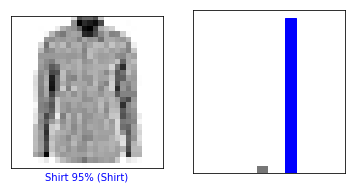

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

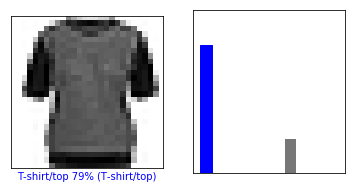

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

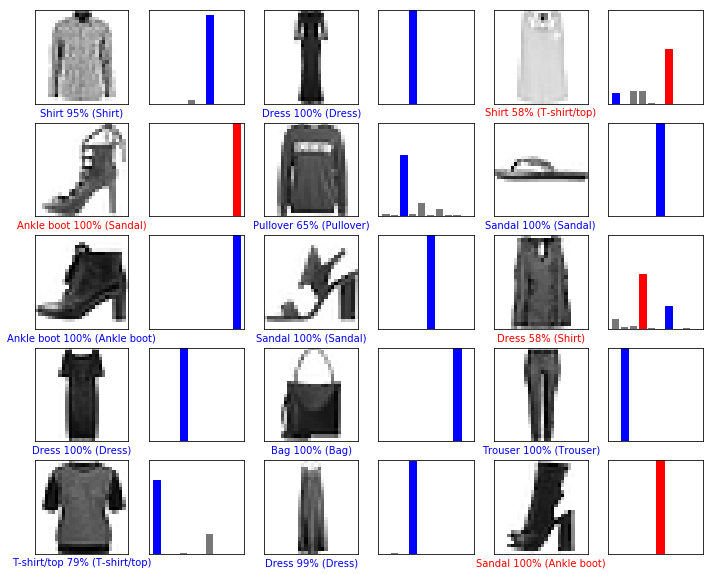

In [33]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [34]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [35]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1820056e-03 1.9958247e-06 1.7127047e-03 8.8751171e-04 4.2769767e-02
  3.2853071e-13 9.5037991e-01 1.5053129e-26 3.0661102e-03 2.0514492e-22]]


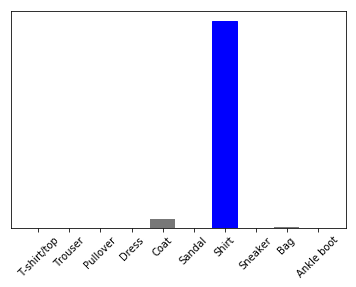

In [50]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

6